# Chapter 3 - Exercises

## Exercise 1 - MNIST accuracy > 97%

In [1]:
# Load MNIST from sklearn

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

c:\Users\Fco\miniconda3\envs\handsonml\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# Get the data. Use values
X, y = mnist["data"], mnist["target"]
X = X.values
y = y.values

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [7]:
from matplotlib import pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

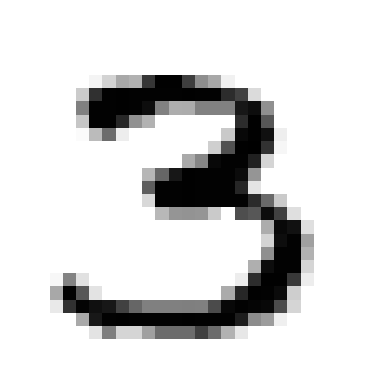

In [9]:
import numpy as np
rand_digit_index = np.random.randint(0, len(X))
plot_digit(X[rand_digit_index])

In [10]:
y[rand_digit_index]

'3'

In [11]:
# Split the data into train and test equally
# There must be same proportion of each digit in train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [12]:
# Lengths
print(len(X_train))
print(len(X_test))

56000
14000


In [14]:
def print_proportions(y):
    for i in range(10):
        print("Proportion of", i, ":", len(y[y == str(i)]) / len(y))

print_proportions(y_train)
print_proportions(y_test)

Proportion of 0 : 0.09860714285714285
Proportion of 1 : 0.11253571428571428
Proportion of 2 : 0.09985714285714285
Proportion of 3 : 0.10201785714285715
Proportion of 4 : 0.09748214285714285
Proportion of 5 : 0.09017857142857143
Proportion of 6 : 0.09823214285714285
Proportion of 7 : 0.10417857142857143
Proportion of 8 : 0.0975
Proportion of 9 : 0.09941071428571428
Proportion of 0 : 0.09864285714285714
Proportion of 1 : 0.1125
Proportion of 2 : 0.09985714285714285
Proportion of 3 : 0.102
Proportion of 4 : 0.0975
Proportion of 5 : 0.09021428571428572
Proportion of 6 : 0.09821428571428571
Proportion of 7 : 0.10421428571428572
Proportion of 8 : 0.0975
Proportion of 9 : 0.09935714285714285


In [15]:
# STEP 1 STANDARD SCALER

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [18]:
# STEP 2 Train using KNeighborsClassifier and GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


knn_clf = KNeighborsClassifier()
params_grid = [
    {'n_neighbors': [3, 4, 5], 'weights': ['uniform', 'distance']}
]

grid_search = GridSearchCV(knn_clf, params_grid, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=10)

In [19]:
# Best stimator
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')